**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Check: region directory**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc_score")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**Check: assay directory**

In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc_score", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


**Set global variable**

In [4]:
## init: region folder
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_FOLDER = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [6]:
TXT_ASSAY_OUT = "CRISPRi-Growth"

vec = c("ASTARR", "WSTARR", "LMPRA", "TMPRA", "ATAC")
names(vec) = vec
VEC_TXT_ASSAY = vec

**Check input files**

In [7]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
txt_fname  = "region.coverage.score.*.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_correlation/fcc_astarr_macs_input_overlap/region.coverage.score.concat.tsv 


## Import data

In [8]:
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_correlation", txt_folder)
    txt_fname = "region.coverage.score.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 586004      8

$fcc_astarr_macs_input_union
[1] 889739      8



Chrom,ChromStart,ChromEnd,Region,Score,Score_Label,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1,10038,10405,chr1:10038-10405,-3.5573621,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,14282,14614,chr1:14282-14614,0.0361388,Scale(Log2FC),ASTARR_KS91,ASTARR
chr1,16025,16338,chr1:16025-16338,-2.1376311,Scale(Log2FC),ASTARR_KS91,ASTARR


**Check: Assay count**

In [9]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::group_by(Assay_Group, Assay_Label) %>%
        dplyr::summarise(Freq = n(), .groups = "drop")
    return(dat)
})

dat = bind_rows(lst, .id = "Folder")
dat = dat %>% tidyr::spread(Folder, Freq)
fun_display_table(dat)

Assay_Group,Assay_Label,fcc_astarr_macs_input_overlap,fcc_astarr_macs_input_union
ASTARR_KS91,ASTARR,150040,246850
ASTARR_KS91,ATAC,150041,246852
CRISPRi-Growth,CRISPRi-Growth,72743,80288
CRISPRi-HCRFF,CRISPRi-HCRFF,925,1330
ENCODE-rE2G,ENCODE-rE2G Benchmark,3035,3169
LMPRA,LMPRA,61478,68497
TMPRA,TMPRA,1148,1722
WSTARR,WSTARR,146594,241031


**Check: Missing values**

In [10]:
lst = lst_dat_region_score_import
lst = lapply(lst, function(dat){
    tmp = any(is.na(dat))
    return(tmp)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] FALSE

$fcc_astarr_macs_input_union
[1] FALSE



In [11]:
### select and split regions by assay
idx = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import

dat = lst[[idx]]
lst = split(dat, dat$Assay_Label)

### assign and show
lst_dat_region_score = lst
print(names(lst))

[1] "ASTARR"                "ATAC"                  "CRISPRi-Growth"       
[4] "CRISPRi-HCRFF"         "ENCODE-rE2G Benchmark" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               


In [12]:
vec_num_hit_rate = c(0.01, 0.05, 0.1, 0.2)
names(vec_num_hit_rate) = c("Top 1%", "Top 5%", "Top 10%", "Top 20%")

In [13]:
lst = lapply(vec_num_hit_rate, function(num_hit_rate){
    
    ### get the output assay
    lst = lst_dat_region_score
    dat = lst[[TXT_ASSAY_OUT]]
    dat_region_score_out = dat
    
    ### get the score of output assay
    dat = dat_region_score_out
    vec = dat$Score
    vec = abs(vec)
    vec_num_score_out = vec
    
    ### determine score cutoff
    num_cutoff_out = quantile(vec_num_score_out, probs = 1 - num_hit_rate)
    
    ### setup group by cutoff
    dat = dat_region_score_out
    dat$Group_CRISPR = ifelse(vec_num_score_out >= num_cutoff_out, 1, 0)
    dat = dat %>% dplyr::select(Region, Group_CRISPR)
    dat_region_group_out = dat
    
    lst = lapply(VEC_TXT_ASSAY, function(txt_assay){
        ### get the input assay
        lst = lst_dat_region_score
        dat = lst[[txt_assay]]
        dat = dat %>% dplyr::select(Region, Score)
        dat_region_score_inp = dat
    
        ### get the score of output assay
        dat = dat_region_score_inp
        vec = dat$Score
        vec_num_score_inp = vec
        
        ### determine score cut off
        num_cutoff_inp = quantile(vec_num_score_inp, probs = 1 - num_hit_rate)
    
        ### setup group by cutoff
        dat = dat_region_score_inp
        dat$Group_Reporter = ifelse(vec_num_score_inp >= num_cutoff_inp, 1, 0)
        dat = dat %>% dplyr::select(Region, Group_Reporter)
        dat_region_group_inp = dat
        
        ### combine group and score
        dat = dplyr::inner_join(
            dat_region_group_out,
            dat_region_group_inp,
            by = "Region"
        )
        dat_region_merge = dat
    
        ### 
        dat = dat_region_merge
        tab = table(
            dat$Group_CRISPR   == 1, 
            dat$Group_Reporter == 1
        )
        
        ### perform fisher exact test
        fit_twoside = fisher.test(tab, alternative = "two.sided", conf.level = 0.95)
        fit_greater = fisher.test(tab, alternative = "greater", conf.level = 0.95)
        
        ### collect results
        num_odds_ratio = as.numeric(fit_twoside$estimate)
        num_ci_lower   = fit_twoside$conf.int[1]
        num_ci_upper   = fit_twoside$conf.int[2]
        num_pvalue     = fit_greater$p.value
    
        res = tibble(
            CutOff_Input = num_cutoff_inp,
            Odds_Ratio   = num_odds_ratio,
            Pvalue       = num_pvalue,
            CI_Lower     = num_ci_lower,
            CI_Upper     = num_ci_upper,
            Size         = nrow(dat_region_merge)
        )
        return(res)
    })

    ###
    dat = bind_rows(lst, .id = "Assay_Input")
    dat = dat %>% 
        dplyr::mutate(
            Assay_Output  = TXT_ASSAY_OUT,
            CutOff_Output = num_cutoff_out,
            Padjust = p.adjust(Pvalue, method = "BH")
        ) %>%
        dplyr::mutate(
            Is_Signif = Padjust < 0.05
        ) %>%
        dplyr::select(
            Assay_Output, Assay_Input, 
            CutOff_Output, CutOff_Input, Size, 
            Odds_Ratio, CI_Lower, CI_Upper,
            Pvalue, Padjust, Is_Signif)
    return(dat)
})

dat = bind_rows(lst, .id = "CutOff_Label")

### assign and show
dat_stats = dat
print(nrow(dat_stats) == length(vec_num_hit_rate) * length(VEC_TXT_ASSAY))
print(dim(dat))
fun_display_table(dat)

[1] TRUE
[1] 20 12


CutOff_Label,Assay_Output,Assay_Input,CutOff_Output,CutOff_Input,Size,Odds_Ratio,CI_Lower,CI_Upper,Pvalue,Padjust,Is_Signif
Top 1%,CRISPRi-Growth,ASTARR,0.7447993,2.9098079,80288,1.835266,1.2649039,2.583907,0.0008741,0.0010926,TRUE
Top 1%,CRISPRi-Growth,WSTARR,0.7447993,2.7833773,79528,3.296615,2.3816786,4.465574,0.0000000,0.0000000,TRUE
Top 1%,CRISPRi-Growth,LMPRA,0.7447993,6.3825162,53957,6.769918,4.6889082,9.530324,0.0000000,0.0000000,TRUE
Top 1%,CRISPRi-Growth,TMPRA,0.7447993,2.9158048,708,4.754092,0.1031246,37.601086,0.2146038,0.2146038,FALSE
Top 1%,CRISPRi-Growth,ATAC,0.7447993,31.6407948,80288,4.842267,3.8825779,5.988579,0.0000000,0.0000000,TRUE
Top 5%,CRISPRi-Growth,ASTARR,0.3787686,1.6337263,80288,1.752846,1.6066600,1.910254,0.0000000,0.0000000,TRUE
Top 5%,CRISPRi-Growth,WSTARR,0.3787686,1.7237717,79528,2.076992,1.9020978,2.265414,0.0000000,0.0000000,TRUE
Top 5%,CRISPRi-Growth,LMPRA,0.3787686,5.1389525,53957,2.723763,2.4084800,3.073253,0.0000000,0.0000000,TRUE
Top 5%,CRISPRi-Growth,TMPRA,0.3787686,2.0073421,708,1.576460,0.5727017,3.749634,0.2000414,0.2000414,FALSE
Top 5%,CRISPRi-Growth,ATAC,0.3787686,14.4505654,80288,2.462360,2.2917164,2.644524,0.0000000,0.0000000,TRUE


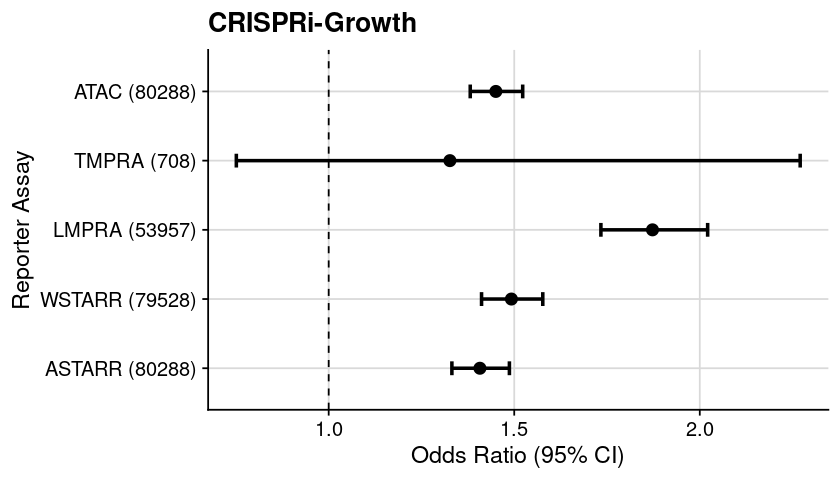

In [16]:
dat = dat_stats

dat = dat %>% dplyr::filter(CutOff_Label == "Top 10%")
dat = dat %>% dplyr::mutate(Assay_Label = paste0(Assay_Input, " (", Size, ")"))
dat = dat %>% 
    dplyr::mutate(Assay_Input = factor(Assay_Input, levels = VEC_TXT_ASSAY)) %>%
    dplyr::arrange(Assay_Input) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels = Assay_Label))
     
gpt = ggplot(dat, aes(x = Assay_Label, y = Odds_Ratio)) +
    geom_point(size = 3) +
    geom_errorbar(aes(ymin = CI_Lower, ymax = CI_Upper), linewidth=1, width = 0.2) +
    geom_hline(yintercept=1, linetype="dashed") +
    coord_flip() +
    labs(y="Odds Ratio (95% CI)", x="Reporter Assay", title = TXT_ASSAY_OUT) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)